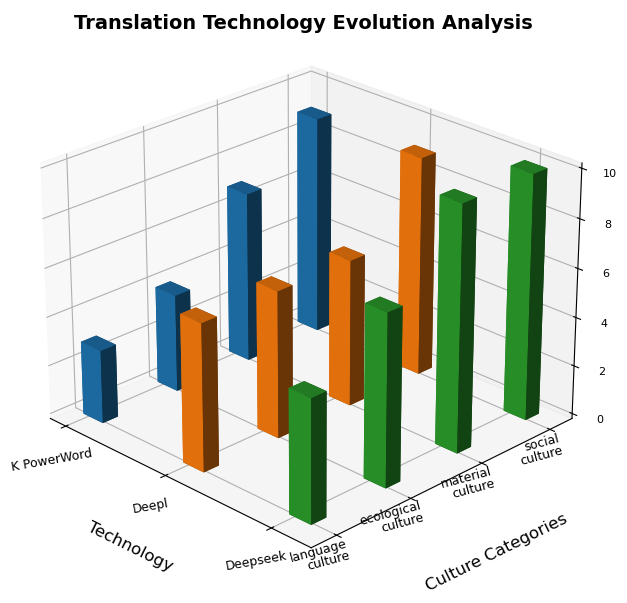

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# === 数据准备 ===
# 假设CSV结构：
#               K PowerWord  Deepl  Deepseek
# language culture          4       6        8
# ecological culture        7       2        5
# material culture          9       4        6
# social culture            5       8        3



# 读取数据（请替换为实际文件路径）
df = pd.read_csv('/Users/liuyongsheng/Desktop/三维数据图谱数据.csv', index_col=0)
techs = df.columns.tolist()  # ['K PowerWord', 'Deepl', 'Deepseek']
categories = df.index.tolist()

# === 图形参数 ===
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 分类颜色
bar_depth = 0.2  # 柱体深度
bar_width = 0.2  # 柱体宽度

# === 坐标轴映射 === 
# 创建三维坐标系
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 生成网格坐标
x_pos = np.arange(len(techs))
y_pos = np.arange(len(categories))
x_grid, y_grid = np.meshgrid(x_pos, y_pos)
x_grid = x_grid.flatten()
y_grid = y_grid.flatten()

# === 数据映射 ===
dz = df.values.T.ravel()  # Z轴数据展平
dx = bar_width * np.ones_like(dz)
dy = bar_depth * np.ones_like(dz)
z_zero = np.zeros_like(dz)

# === 绘图核心 ===
colors = np.tile(colors, len(categories)).tolist()
ax.bar3d(x_grid, y_grid, z_zero, dx, dy, dz, color=colors, shade=True)

# === 轴标签设置 ===
# X轴设置
ax.set_xticks(x_pos )
ax.set_xticklabels(techs, rotation=10, fontsize=9)
ax.set_xlabel('\nTechnology', fontsize=12, labelpad=12)

# Y轴增强设置（含换行处理）
categories_en = ['language\nculture','ecological\nculture','material\nculture','social\nculture']
ax.set_yticks(y_pos + bar_depth/2)
ax.set_yticklabels(categories_en, 
                   fontsize=9, 
                   rotation=15,
                   ha='right', 
                   va='center',
                   linespacing=0.9)
ax.set_ylabel('\nCulture Categories', fontsize=12, labelpad=15)

# Z轴设置


ax.set_zlabel('Scores', fontsize=12,
             labelpad=20,  # ← 增大labelpad值到20-30
             rotation=0)   # ← 移除旋转角度

ax.tick_params(axis='z', labelsize=8)

# == 修改观察视角 ==
ax.view_init(elev=18, azim=-35)  # ← 调低仰角并偏移视角
# === 布局优化 ===
plt.subplots_adjust(left=0.25, right=0.85, bottom=0.15)
ax.view_init(elev=25, azim=-45)  # 调整观察角度

# == 补充坐标轴缩放调整 ==
ax.dist = 11  # ← 调整观察距离（默认为10）


# ...（之前的图形设置代码保持不变）...

# === 布局优化 ===
plt.subplots_adjust(left=0.25, right=0.85, bottom=0.15)

# === 标题与视角 ===
ax.view_init(elev=25, azim=-45)
ax.set_title('Translation Technology Evolution Analysis',
             fontsize=14,
             y=1.0,
             pad=20,
             fontweight='semibold')


# === 保存到Mac桌面 ===
desktop_path = os.path.expanduser('~/Desktop/')
plt.savefig(os.path.join(desktop_path, '3D_Visualization.png'), 
           dpi=300, 
           bbox_inches='tight',
           facecolor='white')


plt.show()
